In [107]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [108]:
df = pd.read_csv('../datasets/Data.csv')
df.head(10)

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
0,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2009,5.22,5.22%,68100,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
1,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2008,5.43,5.43%,65240,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
2,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2007,5.61,5.61%,61080,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
3,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2006,5.40,5.4%,55270,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
4,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2005,5.00,5%,51970,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
5,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2004,5.00,5%,47310,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
6,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2003,5.00,5%,43880,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
7,108,Burundi,NaN,0111,Wheat,2020,3.50,3.5,NaN,"Shelling, Threshing",Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
8,108,Burundi,NaN,0111,Wheat,2020,4.87,4.87,NaN,Storage,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
9,108,Burundi,NaN,0111,Wheat,2020,2.50,2.5,NaN,Transportation,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN


In [109]:
dfOrderedAscCountry = df.sort_values(by='country', ascending=True)
dfOrderedDescYear = df.sort_values(by='year', ascending=False)
dfOrderedDescYear.head()

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
15566,524,Nepal,NaN,0111,Wheat,2021,3.70,3.70%,NaN,Shelling,Farm,NaN,NaN,NaN,No Data Collection Specified,"lacrast (2021), Towards integrated commodity ....",NaN,Reference has been generated automatically
20214,710,South Africa,NaN,01359.90,"Other fruits, n.e.c.",2021,18.30,18.3%,NaN,Storage,Storage,NaN,NaN,NaN,Modelled Estimates,"LGODFREY (2021), South africa has committed to...",NaN,Reference has been generated automatically
15572,524,Nepal,NaN,0112,Maize (corn),2021,2.85,2.85%,NaN,Shelling,Farm,NaN,NaN,NaN,No Data Collection Specified,"lacrast (2021), Towards integrated commodity ....",NaN,Reference has been generated automatically
16689,586,Pakistan,NaN,01599.20,Edible roots and tubers with high starch or in...,2021,6.50,6.5%,NaN,Retailing,Retail,Fresh roots and tubers,NaN,NaN,Modelled Estimates,"Jahangeer, Raja (FAOPK) (2021), FLW in Pakista...",NaN,Reference has been generated automatically
16690,586,Pakistan,NaN,01599.20,Edible roots and tubers with high starch or in...,2021,2.50,2.5%,NaN,Wholesale,Wholesale,Fresh roots and tubers,NaN,NaN,Modelled Estimates,"Jahangeer, Raja (FAOPK) (2021), FLW in Pakista...",NaN,Reference has been generated automatically


In [110]:
#dfDropCommodityDuplicates = df.commodity.drop_duplicates()
#dfDropCommodityDuplicates

#count = df.commodity.unique().size
#count

print(df.commodity.value_counts())

Maize (corn)                          5246
Rice                                  4299
Millet                                3398
Sorghum                               3390
Wheat                                 2052
                                      ... 
Raisins                                  1
Wine                                     1
Broad beans and horse beans, green       1
Flour of buckwheat                       1
Camels                                   1
Name: commodity, Length: 195, dtype: int64


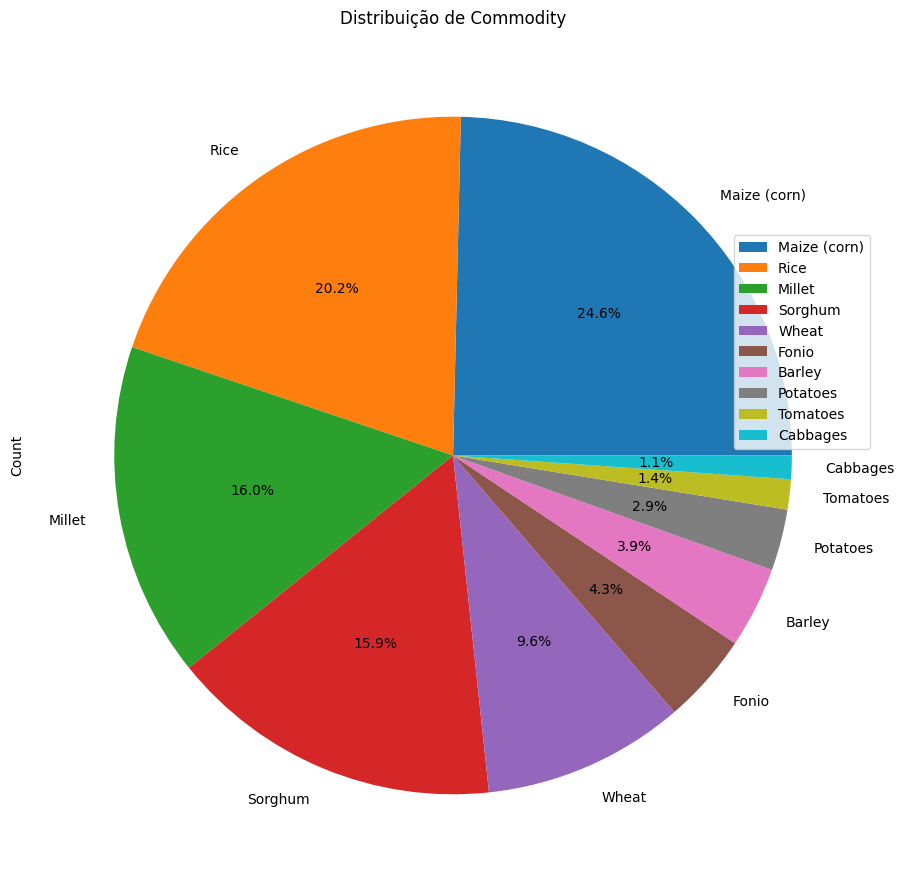

In [111]:
dfCommodityCount = df['commodity'].value_counts().head(10).to_frame()
dfCommodityCount = dfCommodityCount.reset_index().rename(columns={'index': 'Commodity', 'commodity': 'Count'})

fig, ax = plt.subplots(figsize=(11, 11))

# plotar gráfico de pizza
dfCommodityCount.plot.pie(y='Count', ax=ax, labels=dfCommodityCount['Commodity'], autopct='%1.1f%%')

# definir título do gráfico
ax.set_title('Distribuição de Commodity')

# ajustar posição da legenda
ax.legend(loc='lower right', bbox_to_anchor=(1, 0.5))

# mostrar gráfico
plt.show()

In [112]:
# agrupar dataframe por "country" e "commodity" e contar o número de aparições de cada commodity
df_grouped = df.groupby(['country', 'commodity']).size().reset_index(name='Count')

# agrupar dataframe por "commodity" e somar as aparições de cada commodity em todos os "country"
df_summed = df_grouped.groupby(['commodity'])['Count'].sum().reset_index(name='Total')

print(df_summed)

                                             commodity  Total
0                                    Almonds, in shell     15
1    Anise, badian, coriander, cumin, caraway, fenn...     28
2                                          Apple juice     19
3                                               Apples    152
4                                             Apricots     58
..                                                 ...    ...
190                                              Wheat   2052
191                             Wheat and meslin flour     50
192                                               Wine      1
193                                               Yams     46
194                                             Yautia     25

[195 rows x 2 columns]


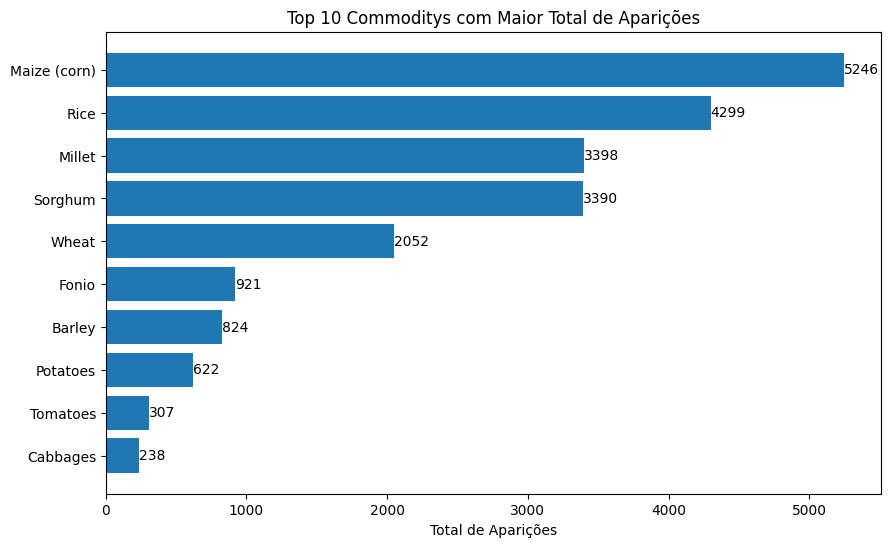

In [113]:
df_top10 = df_summed.nlargest(10, 'Total')

# criar figura com tamanho personalizado
fig, ax = plt.subplots(figsize=(10, 6))

# plotar gráfico de barras horizontais
bars = ax.barh(df_top10['commodity'], df_top10['Total'])

# definir título do gráfico
ax.set_title('Top 10 Commoditys com Maior Total de Aparições')

# definir rótulo do eixo x
ax.set_xlabel('Total de Aparições')

# inverter ordem dos valores no eixo y para que o gráfico comece com a commodity mais à esquerda
ax.invert_yaxis()

# adicionar informações numéricas acima de cada barra
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, '{:.0f}'.format(width), ha='left', va='center')

# mostrar gráfico
plt.show()

C:\Users\danie\AppData\Local\Temp\ipykernel_2656\2039741073.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['loss_quantity'] = df_year['loss_quantity'].astype('float').fillna(0).astype('int')


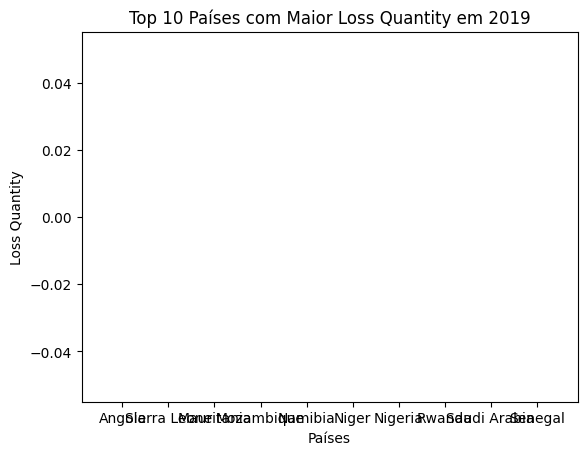

In [128]:
dfDroppingLQNulos = df.dropna(subset=['loss_quantity'])

year = 2019
df_year = df[df['year'] == year]
df_year['loss_quantity'] = df_year['loss_quantity'].astype('float').fillna(0).astype('int')

df_country = df_year.groupby('country')['loss_quantity'].sum()

df_top10 = df_country.sort_values(ascending=False)[:10]

plt.bar(df_top10.index, df_top10.values)
plt.xlabel('Países')
plt.ylabel('Loss Quantity')
plt.title(f'Top 10 Países com Maior Loss Quantity em {year}')
plt.show()